In [1]:
import os
import pandas as pd
import re
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.stem import WordNetLemmatizer
from gensim.models.phrases import Phrases, Phraser
from sklearn.feature_extraction.text import TfidfVectorizer



# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/asa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/asa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/asa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/asa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/asa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/asa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)


lemmatizer = WordNetLemmatizer()


# Additional preprocessing
stop_words = set(stopwords.words('english'))
custom_stopwords = ['older', 'people', 'adults','like','make','help','kentucky','members','use','users','user','world','aging','using','seniors','senior','age','product','products','new','year','years','000','provide','provides','based','team','way', 'we','are','we_are','nan','nan_nan','tc', 'pineway','medly','enables','ehr','northwest', 'without', 'balloon','face','Other','stakeholder', 'dml','which_allows','qura','._','africa','will_allow','cisco','\'ll','ranging_from','avizia','whose_mission','--','ehrs','zorpia','hellocare','//care.coach','karie','byenbye','cost_to','binata','inc.','etc','2_)','1_)','\'_s','80%_%','20%_%','those_who','llc','we_offer','inclue','others','list','top','yet','NOVELTY','e.g','1-3','12a','cam','mpu6050','cic'
                    ]  
stop_words.update(custom_stopwords)
punctuation = set(string.punctuation)

def preprocess(tokens):
    filtered_tokens = []
    for token in tokens:
        lower_token = token.lower()
        if (lower_token not in stop_words and 
            lower_token not in punctuation and 
            not lower_token.isdigit() and 
            len(lower_token) > 1):
            lemmatized_token = lemmatizer.lemmatize(lower_token, get_wordnet_pos(lower_token))
            filtered_tokens.append(lemmatized_token)
    return filtered_tokens

In [3]:
df1 = pd.read_csv('/Users/asa/VScode/liter/liter_data/liter1.csv')
df2 = pd.read_csv('/Users/asa/VScode/liter/liter_data/liter2.csv')
df3 = pd.read_csv('/Users/asa/VScode/liter/liter_data/liter3.csv')
df4 = pd.read_csv('/Users/asa/VScode/liter/liter_data/liter4.csv')
df5 = pd.read_csv('/Users/asa/VScode/liter/liter_data/liter5.csv')

df1['text'] = df1[['Article Title','Author Keywords','Abstract']].astype(str).agg(' '.join, axis=1)
df2['text'] = df2[['Article Title','Author Keywords','Abstract']].astype(str).agg(' '.join, axis=1)
df3['text'] = df3[['Article Title','Author Keywords','Abstract']].astype(str).agg(' '.join, axis=1)
df4['text'] = df4[['Article Title','Author Keywords','Abstract']].astype(str).agg(' '.join, axis=1)
df5['text'] = df5[['Article Title','Author Keywords','Abstract']].astype(str).agg(' '.join, axis=1)

df1['title'] = df1['Article Title']  
df1['affliations'] = df1['Affiliations']  
df2['title'] = df2['Article Title']  
df2['affliations'] = df2['Affiliations'] 
df3['title'] = df3['Article Title']  
df3['affliations'] = df3['Affiliations'] 
df4['title'] = df4['Article Title']  
df4['affliations'] = df4['Affiliations'] 
df5['title'] = df5['Article Title']  
df5['affliations'] = df5['Affiliations'] 

temp_df1 = df1[['text', 'title','affliations']]
temp_df2 = df2[['text', 'title','affliations']]
temp_df3 = df3[['text', 'title','affliations']]
temp_df4 = df4[['text', 'title','affliations']]
temp_df5 = df5[['text', 'title','affliations']]

combined_df = pd.concat([temp_df1, temp_df2,temp_df3,temp_df4,temp_df5], ignore_index=True)

combined_df.dropna(subset=['text'], inplace=True)

# Detecting Phrases (Bigrams)
# First, tokenize the text for phrase modeling
sentence_stream = [word_tokenize(doc.lower()) for doc in combined_df['text']]
bigram_model = Phrases(sentence_stream, min_count=10, threshold=50)  # Tune these parameters as needed
bigram_phraser = Phraser(bigram_model)

# Apply the bigram model to each document
combined_df['bigram_tokens'] = combined_df['text'].apply(lambda doc: bigram_phraser[word_tokenize(doc.lower())])

combined_df['tokens'] = combined_df['bigram_tokens'].apply(preprocess)

sample_text = combined_df['text'].iloc[0]
print("Before preprocessing:", sample_text)
print("After preprocessing:", preprocess(sample_text))


Before preprocessing: Development of system for prevention of solitary death with mobile devices Mobile device; Solitary death Japan has problems with the declining birth rate and growing of aging population. The number of solitary aged persons has been on the increase. In social situation like this, a solitary death of aged person becomes a serious problem and to establish the system to prevent it is urgent necessity. Some safety equipments for aged people are already sold in Japan, but they have not been widely used because most of them are considerably expensive and users need to pay contract price or usage fee. By taking into consideration an increase in solitary aged persons toward an aged person society, we studied and developed the application, Anshin, for mobile devices to prevent solitary death and the network system, Otassha Tushin, to monitor and support conditions of solitary aged persons on a server. We will distribute these systems for solitary aged persons and their fami

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert tokenized documents back to strings
combined_df['processed_text'] = combined_df['tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=4, stop_words='english')

# Fit and transform the processed texts to a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df['processed_text'])

# tfidf_matrix is a sparse matrix of shape (n_samples, n_features)


# preprocess endding
# word2vec training and vectorization

In [4]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import numpy as np

# Preparing the data: Tagging each document with a unique ID
texts = combined_df['tokens'].tolist()  # Assuming 'tokens' is a list of tokenized documents
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(texts)]

# Creating and training the Doc2Vec model
model = Doc2Vec(vector_size=500, window=20, min_count=4, dm=1, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Inspecting the model's vocabulary
vocabulary_words = list(model.wv.key_to_index.keys())
print("Corrected vocabulary sample:", vocabulary_words[:10])

# Function to retrieve the vector for a document
def document_vector(doc_id):
    return model.dv[doc_id]

# Apply the function to retrieve vectors for all documents
doc_vectors = np.array([document_vector(str(i)) for i in range(len(texts))])


Corrected vocabulary sample: ['health', 'care', 'patient', 'system', 'study', 'elderly', 'technology', 'monitoring', 'home', 'service']


In [5]:
print(doc_vectors.shape)


(4773, 500)


In [6]:
from sklearn.preprocessing import StandardScaler

vectors = np.stack(doc_vectors)

# 数据标准化，确保每个特征的平均值为0，方差为1
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)

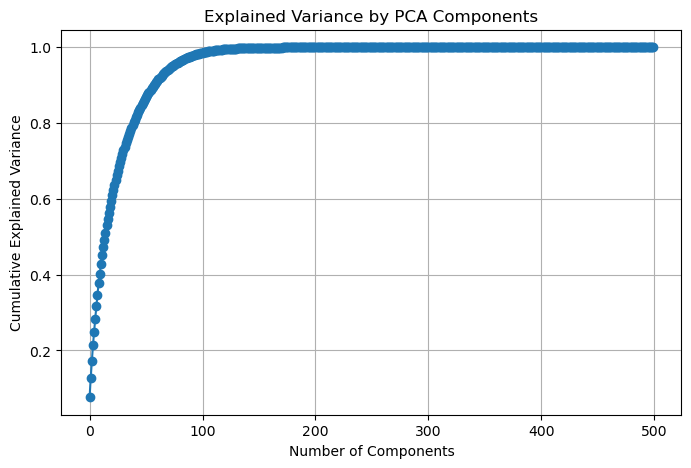

Number of components to retain: 75


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(vectors_scaled)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance to find the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Decide on a threshold for cumulative explained variance, e.g., 0.95
n_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1
print(f'Number of components to retain: {n_components}')

# Initialize PCA with the number of components found
pca = PCA(n_components=n_components)
vectors_pca = pca.fit_transform(vectors_scaled)

# Drawing figure

/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

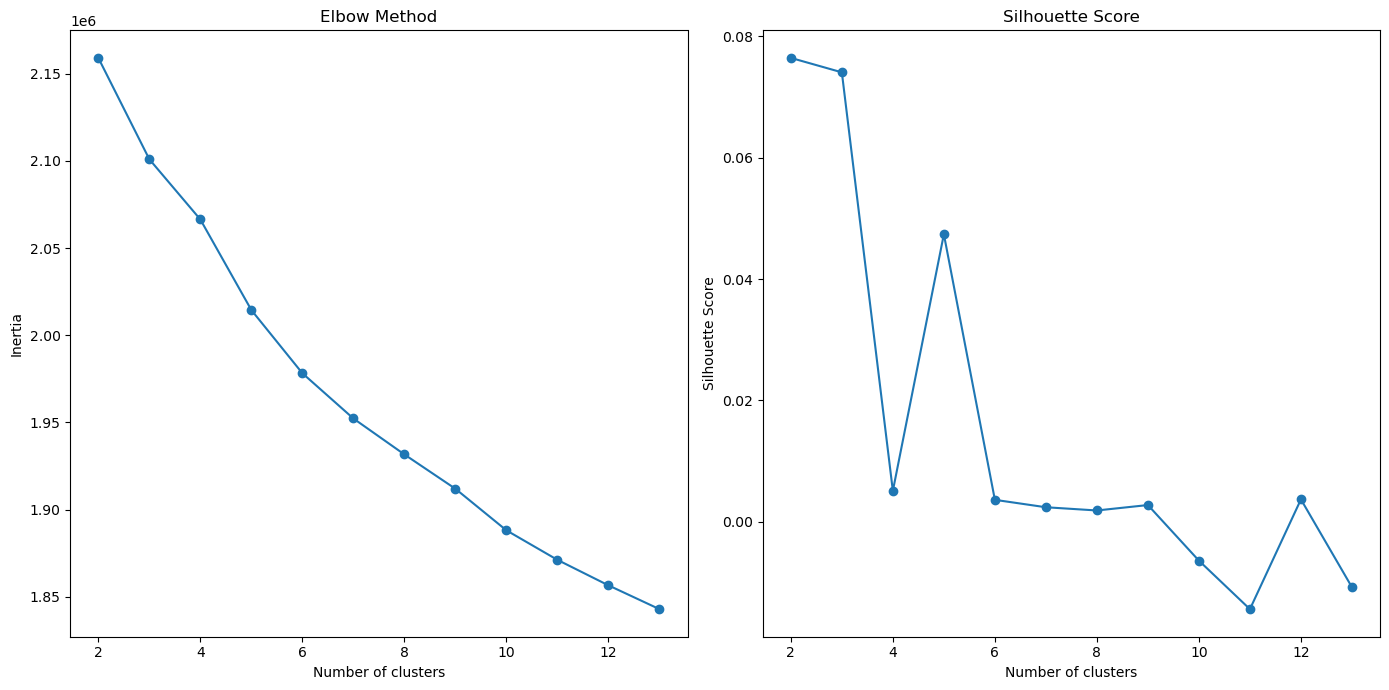

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
silhouette_scores = []

# Define the range of clusters to try
range_of_clusters = range(2, 14)  # For example, from 2 to 10

for n_clusters in range_of_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(vectors_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(vectors_pca, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range_of_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plotting the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_of_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [9]:
# Choose the number of clusters
num_clusters = 5  # Adjust based on your needs

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors_pca)
# Assign the cluster labels to your original DataFrame
combined_df['cluster'] = kmeans.labels_


/opt/miniconda3/envs/glove_kmeans/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


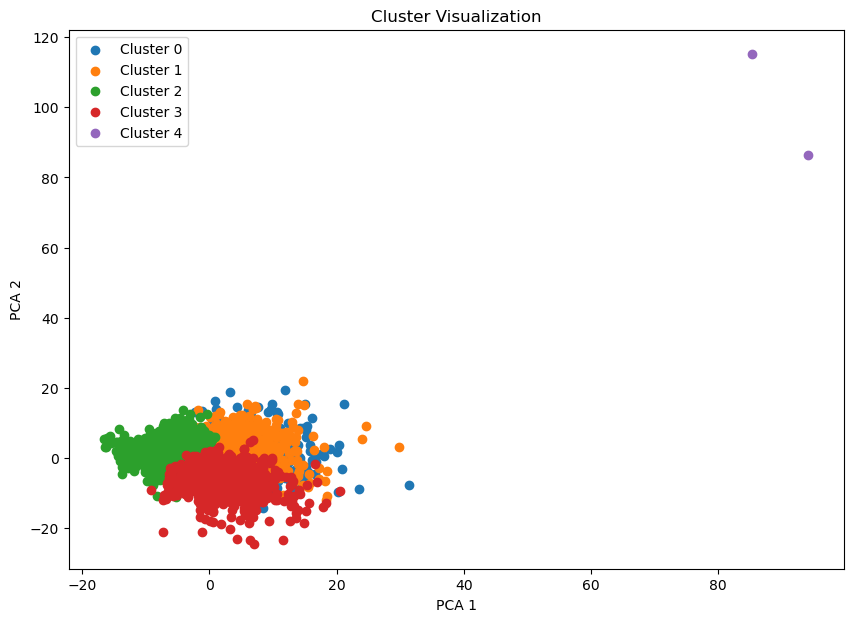

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors_pca)

# Plot the clusters
plt.figure(figsize=(10, 7))
for i in range(num_clusters):
    plt.scatter(reduced_vectors[kmeans.labels_ == i, 0], reduced_vectors[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.legend()
plt.title('Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [11]:
from scipy.spatial.distance import cdist  # Add this import statement

centroids = kmeans.cluster_centers_

def find_closest_words(features, centroid, word_model, top_n=40):
    # Compute the cosine similarity between the centroid and all word vectors
    distances = cdist(features, [centroid], "cosine")[..., 0]
    # Get the indices of the top_n smallest distances
    closest_word_indices = distances.argsort()[:top_n]
    # Return the corresponding words
    return [word_model.index_to_key[i] for i in closest_word_indices]

# For each cluster centroid, find and print the closest words
for i, centroid in enumerate(centroids):
    words = find_closest_words(vectors_pca, centroid, model.wv)
    print(f"Cluster {i}: {', '.join(words)}")


Cluster 0: diminish, ovid_medline, property, inform, diagnose, bibliometric_analysis, wearable, park, multimorbidity, findings_indicate, accelerate, australian, pediatric, assist, five, job, clarify, case, measurable, owe, skin_temperature, contains, actively, memory, compute, amd, canadian, tier, postintervention, hospitalization, state, recreation, signal, male, widely, cheaper, automation, diabetic, et, optimise
Cluster 1: protection, smartwatches, reporting, administer, production, redundancy, confidence_interval, manufacturing, strategic, drawn, science, iomt, integrates, good, ict, velocity, cholesterol, package, primary_outcome, western, amongst, geriatrician, digital_transformation, 2015_elsevier, mics, lockdown, music, colour, income, prescribe, diabetes_mellitus, promising, query, healthy_lifestyle, danger, subsequent, multi-hop, roc, michigan, extent
Cluster 2: 0.1, mile, trigger, automatic, cll, activity_trackers, regular, ephr, view, still, novice, procedure, shorten, rt, 

In [12]:
import pandas as pd

# Assume 'combined_df' is your DataFrame containing the documents
# Assign cluster labels to each document based on the cluster assignments
combined_df['cluster_label'] = kmeans.labels_

# Save the DataFrame to a CSV file
combined_df.to_csv('label.csv', index=False)

print("Cluster labels added and saved to CSV file.")


Cluster labels added and saved to CSV file.
